# Importing the library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [4]:
df = pd.read_csv("cardio_train.csv",sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Check the datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Null Value Exists?

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# Duplicate value exists?

In [10]:
df.duplicated().sum()

0

# Data distribution type

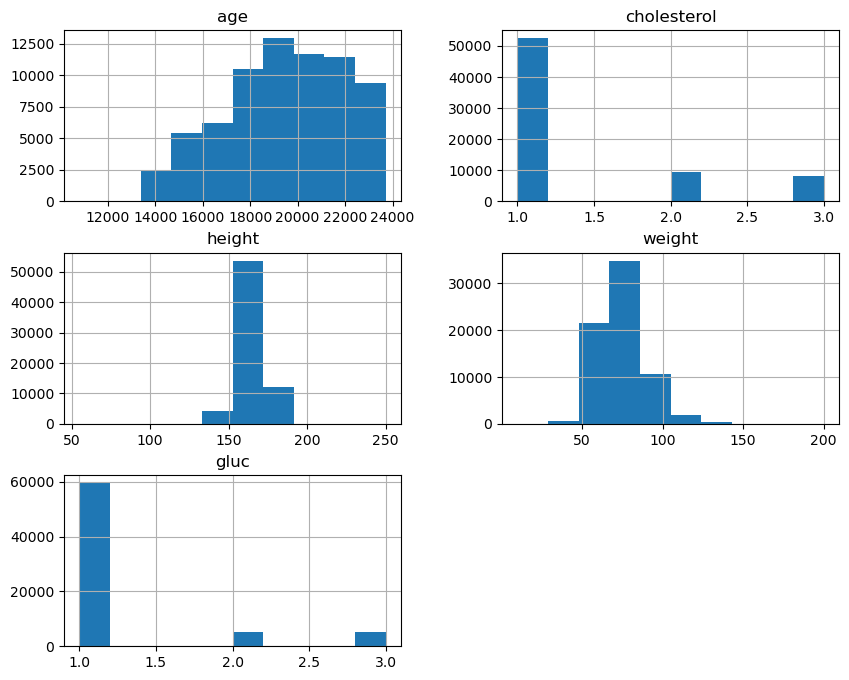

In [12]:
df[['age', 'cholesterol', 'height', 'weight',  'gluc']].hist(figsize=(10,8))
plt.show()

# Convert age into the years

In [14]:

df = df[df["age"]>0]

if df["age"].mean() > 100:
    df["age_years"] = (df["age"]/365).round(1)
else:
    df["age_years"] = df["age"]

# Design boxplot and check the outlier if present 

# -> Age

<Axes: ylabel='age_years'>

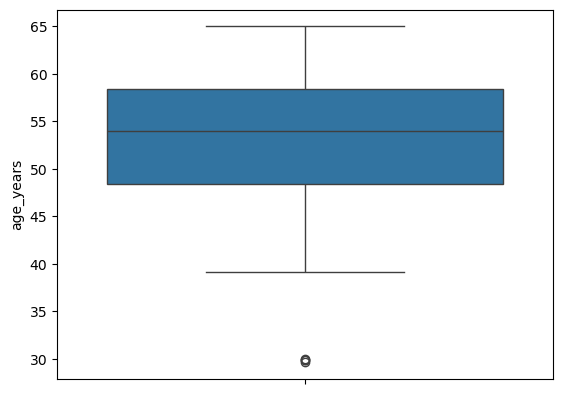

In [17]:
sb.boxplot(df['age_years'])

# -> Height

<Axes: ylabel='height'>

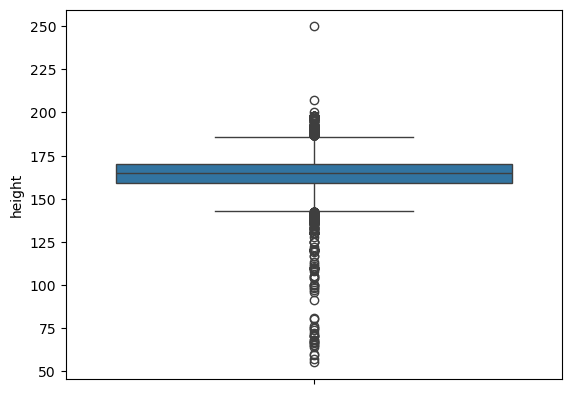

In [19]:
sb.boxplot(df['height'])

<Axes: ylabel='height'>

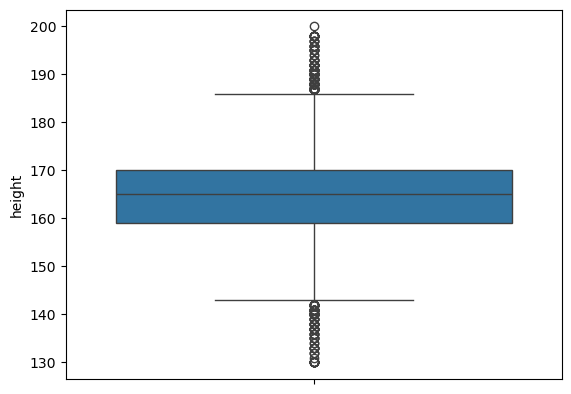

In [20]:
# standard condition of height
df = df[(df['height']>=130) & (df['height']<=200)]
sb.boxplot(df['height'])

# -> Weight

<Axes: ylabel='weight'>

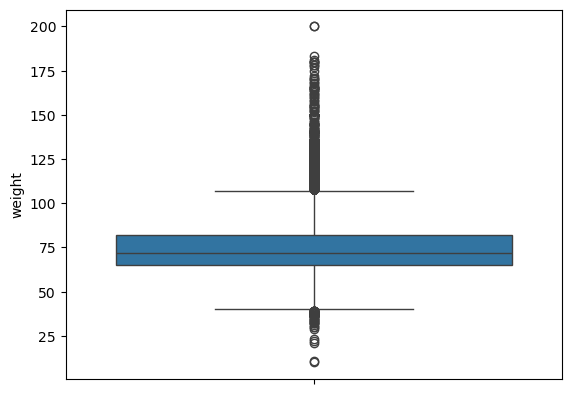

In [22]:
sb.boxplot(df['weight'])

<Axes: ylabel='weight'>

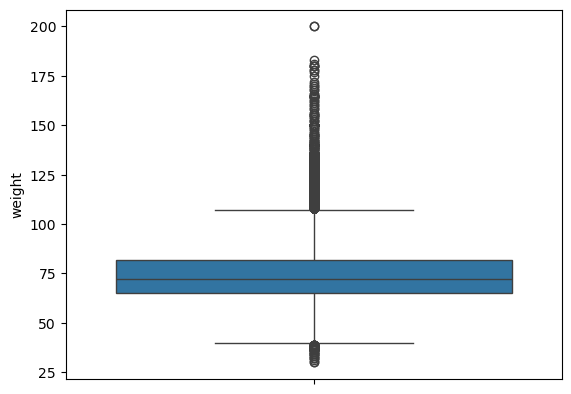

In [23]:
# standard weight condition
df = df[(df['weight'] >= 30) & (df['weight'] <= 200)]
sb.boxplot(df['weight'])

# -> ap_hi

<Axes: ylabel='ap_hi'>

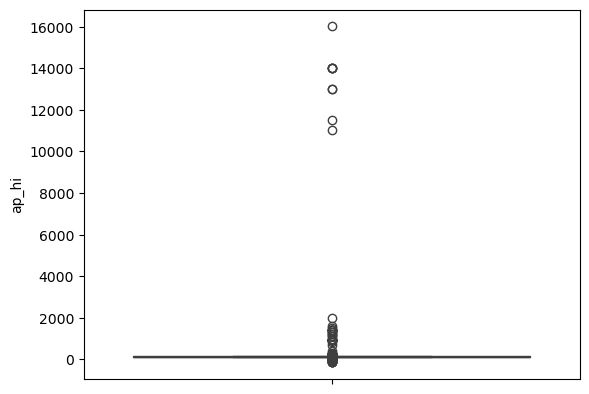

In [25]:
sb.boxplot(df['ap_hi'])


<Axes: ylabel='ap_hi'>

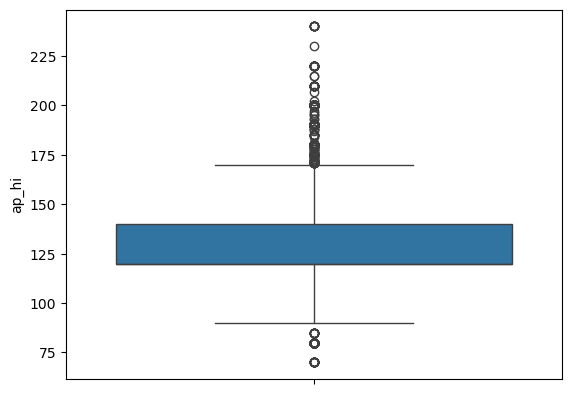

In [26]:
# remove outliers on ap_hi column
df = df[(df['ap_hi']>=70) & (df['ap_hi']<=250)]
sb.boxplot(df['ap_hi'])

<Axes: xlabel='ap_hi', ylabel='Count'>

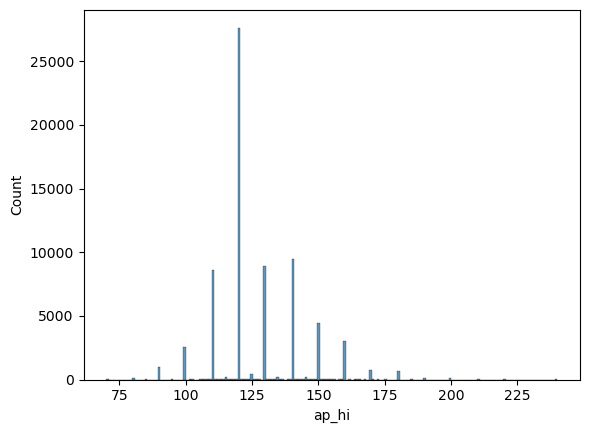

In [27]:
sb.histplot(df['ap_hi'])

# -> ap_lo

<Axes: ylabel='ap_lo'>

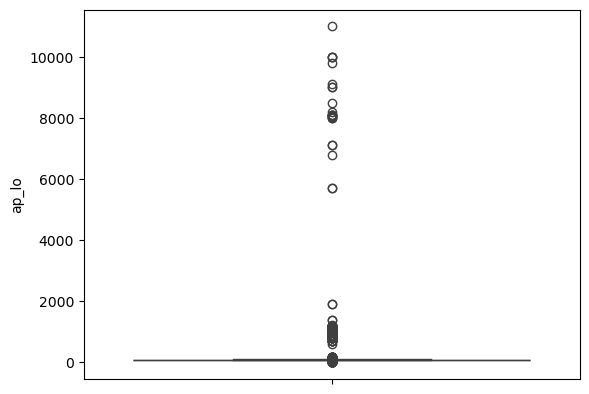

In [29]:
sb.boxplot(df['ap_lo'])


<Axes: ylabel='ap_lo'>

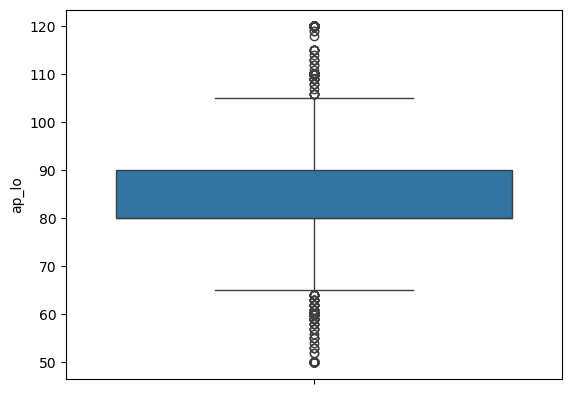

In [30]:
# remove outliers in ap_lo column
df = df[(df['ap_lo']>=50) & (df['ap_lo']<=120)]
sb.boxplot(df['ap_lo'])

<Axes: xlabel='ap_lo', ylabel='Count'>

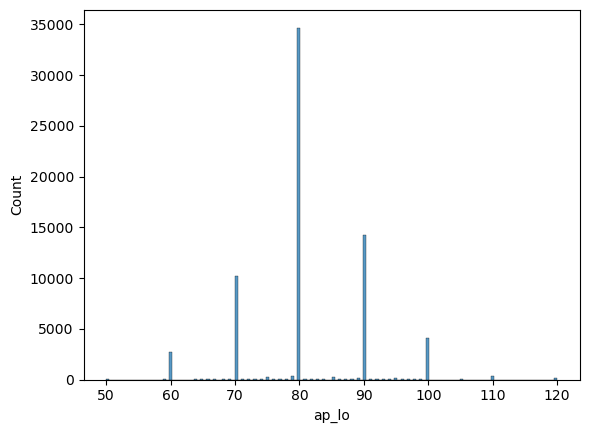

In [31]:
sb.histplot(df['ap_lo'])

# Check the number of outlier if small then remove otherwise replace with standard value

In [33]:
def calculate_iqr_fences(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return lower_fence, upper_fence

ap_hi_L, ap_hi_U = calculate_iqr_fences(df['ap_hi'])

ap_lo_L, ap_lo_U = calculate_iqr_fences(df['ap_lo'])

In [34]:
ap_hi_outliers = df[(df['ap_hi'] < ap_hi_L) | (df['ap_hi'] > ap_hi_U)]
ap_lo_outliers = df[(df['ap_lo'] < ap_lo_L) | (df['ap_lo'] > ap_lo_U)]

print(f"Total no. of outliers: {len(ap_hi_outliers)+len(ap_lo_outliers)}")

Total no. of outliers: 4483


# -> Remove the outlier

In [102]:
def remove_outliers_iqr(df, cols):
    initial_rows = df.shape[0]

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower) & (df[col] <= upper)]

    final_rows = df.shape[0]
    print("Total outliers removed:", initial_rows - final_rows)

    return df


In [104]:
iqr_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
df=remove_outliers_iqr(df, iqr_cols)


Total outliers removed: 263


# Impact of cholestrol

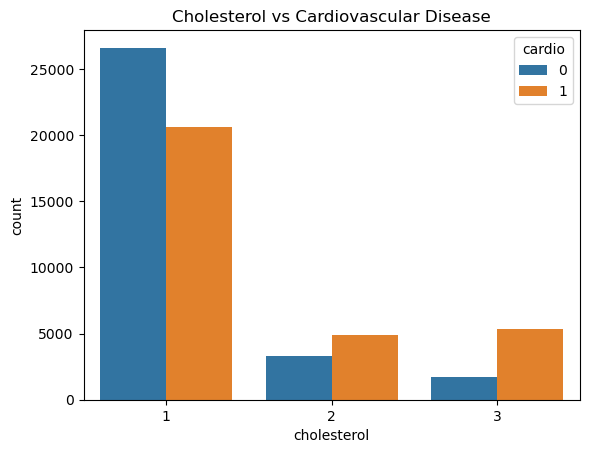

In [39]:
sb.countplot(x='cholesterol', hue='cardio', data=df)
plt.title("Cholesterol vs Cardiovascular Disease")
plt.show()

# Impact of glucose

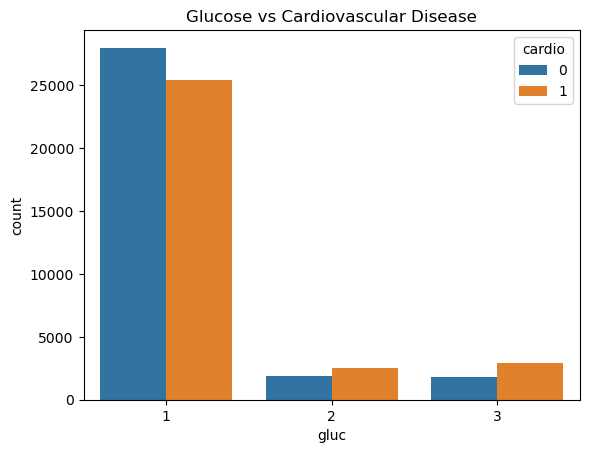

In [41]:
sb.countplot(x='gluc', hue='cardio', data=df)
plt.title("Glucose vs Cardiovascular Disease")
plt.show()

# Calculate BMI

In [43]:
df["height_m"] = df["height"]/100
df["bmi"] = df["weight"] / (df["height_m"] ** 2)

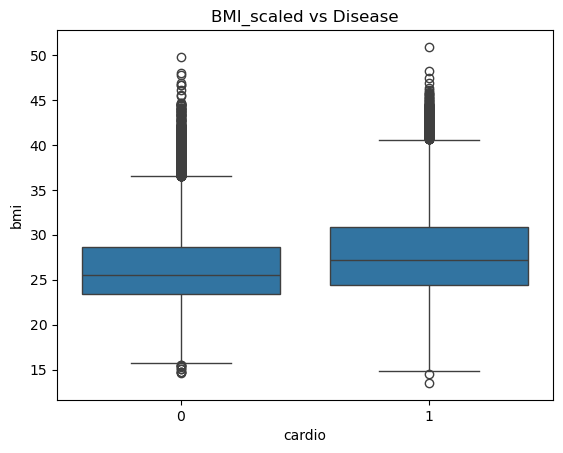

In [44]:
sb.boxplot(x='cardio', y='bmi', data=df)
plt.title("BMI_scaled vs Disease")
plt.show()

# Ap_hi and Ap_lo impact on health

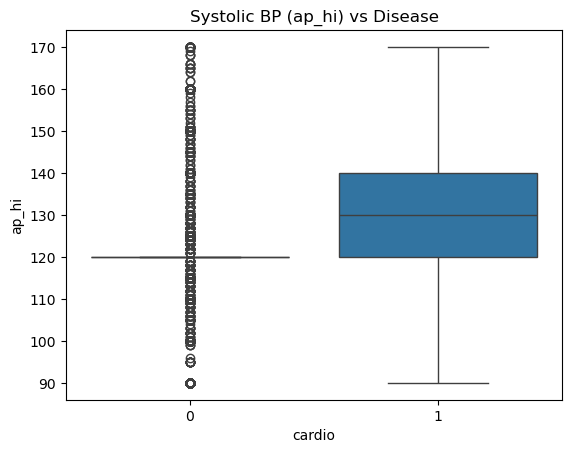

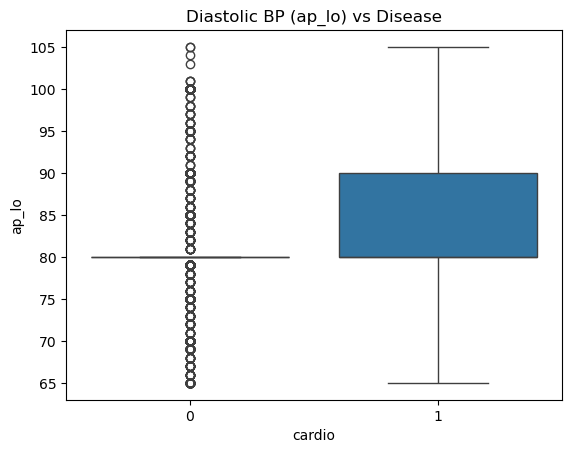

In [46]:
sb.boxplot(x='cardio', y='ap_hi', data=df)
plt.title("Systolic BP (ap_hi) vs Disease")
plt.show()
# high ap_hi -> high chance of disease

sb.boxplot(x='cardio', y='ap_lo', data=df)
plt.title("Diastolic BP (ap_lo) vs Disease")
plt.show()
# high ap_lo -> high chance of disease

# Correlation heatmap

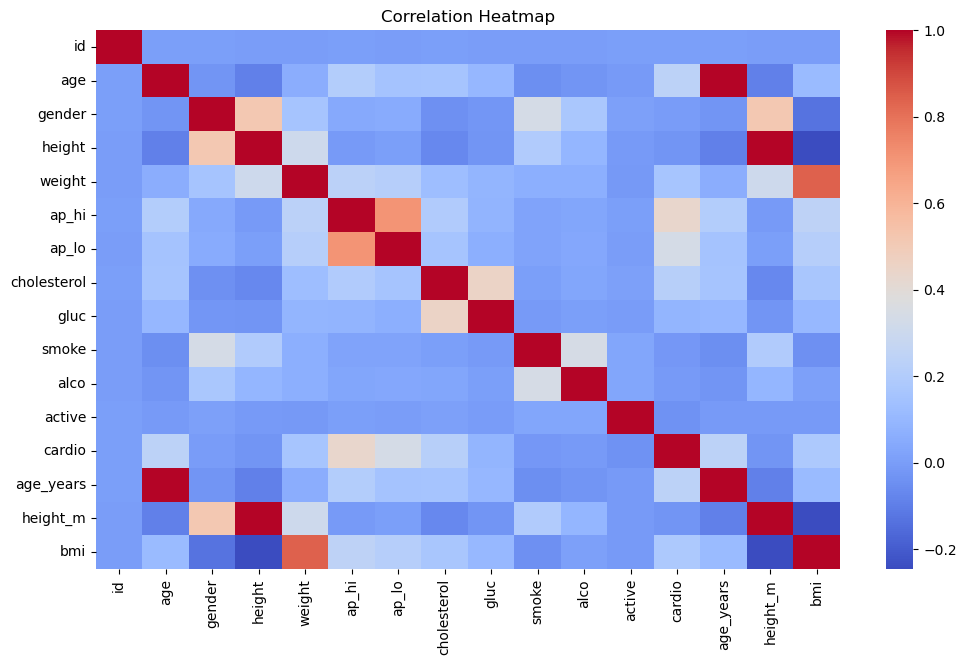

In [48]:
plt.figure(figsize=(12,7))
sb.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Perfect graphs between some conditions

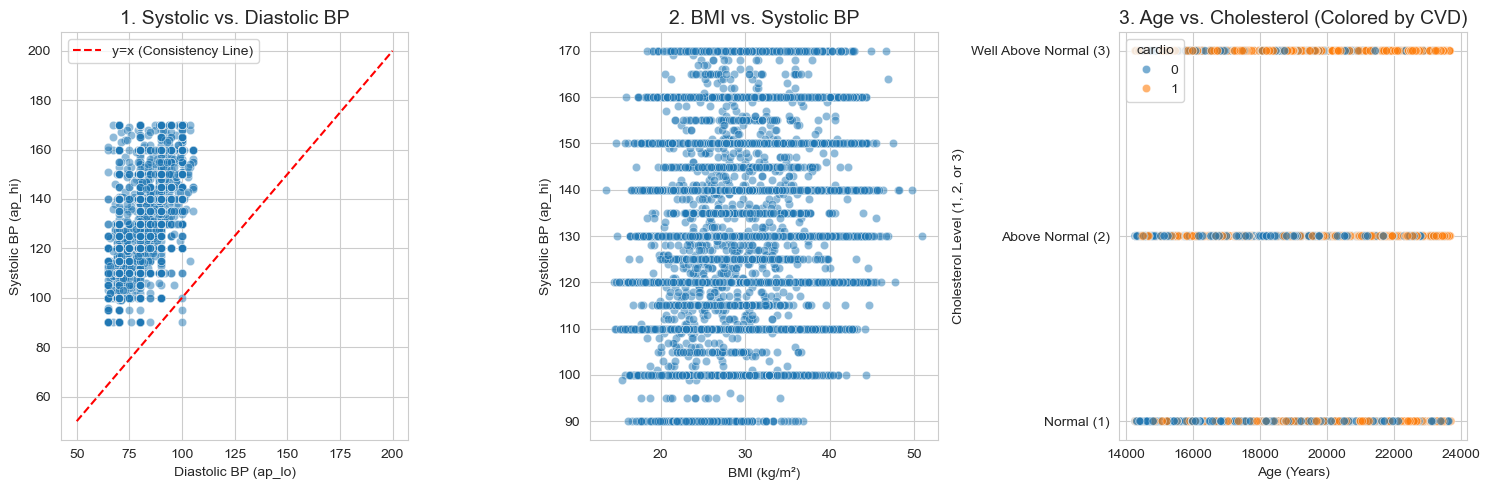

In [50]:
sb.set_style("whitegrid")
plt.figure(figsize=(15, 5))

# --- Plot 1: ap_lo vs. ap_hi ---
plt.subplot(1, 3, 1)
sb.scatterplot(x='ap_lo', y='ap_hi', data=df, alpha=0.5)
plt.title('1. Systolic vs. Diastolic BP', fontsize=14)
plt.xlabel('Diastolic BP (ap_lo)')
plt.ylabel('Systolic BP (ap_hi)')
# Add a line for the expected ap_hi > ap_lo boundary (y=x)
plt.plot([50, 200], [50, 200], 'r--', label='y=x (Consistency Line)')
plt.legend()


# --- Plot 2: BMI vs. ap_hi ---
plt.subplot(1, 3, 2)
sb.scatterplot(x='bmi', y='ap_hi', data=df, alpha=0.5)
plt.title('2. BMI vs. Systolic BP', fontsize=14)
plt.xlabel('BMI (kg/m²)')
plt.ylabel('Systolic BP (ap_hi)')


# --- Plot 3: Age vs. Cholesterol (Colored by Target) ---
plt.subplot(1, 3, 3)
sb.scatterplot(x='age', y='cholesterol', hue='cardio', data=df, alpha=0.6)
plt.title('3. Age vs. Cholesterol (Colored by CVD)', fontsize=14)
plt.xlabel('Age (Years)')
plt.ylabel('Cholesterol Level (1, 2, or 3)')
plt.yticks([1, 2, 3], ['Normal (1)', 'Above Normal (2)', 'Well Above Normal (3)'])

plt.tight_layout()
plt.show()

# Mean Arterial Pressure (MAP)

In [52]:
df['MAP'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3


# Pulse pressure

In [54]:
df["Pulse_Pressure"] = df["ap_hi"] - df["ap_lo"]

In [55]:
continuous_features=['age', 'height', 'weight', 'BMI', 'MAP', 'Pulse_Pressure']
categorical_features=['gender', 'gluc', 'smoke', 'alco', 'active', 'cholesterol']
target_feature=['cardio']

In [56]:
df.to_csv("new_cleaned_cardio_data.csv", index=False)
